In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read dataset
df = pd.read_csv('../content/movie_metadata.csv')
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
# shape of dataset
df.shape

(5043, 28)

In [11]:
# Drop off samples with NaN values
df.dropna(inplace = True)
df.shape

(3756, 28)

In [12]:
# Select the relevant columns as features and target
features = df[['budget', 'imdb_score', 'movie_facebook_likes']]
target = df['gross']

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5129250822288391.0


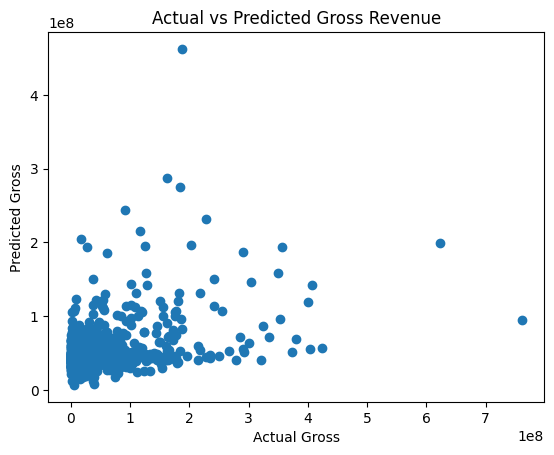

In [16]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.title('Actual vs Predicted Gross Revenue')
plt.show()

In [17]:
import pickle
# Save the model
pickle.dump(model,  open("../content/MoviePredict_LinearRegressionModel.pkl", 'wb'))

In [18]:
import pickle
f = open("../content/MoviePredict_LinearRegressionModel.pkl", 'rb')
lr_model = pickle.load(f)
f.close()
y_pred = lr_model.predict(X_test)

# New Section